# Setup stuff

In [78]:
%load_ext autoreload
%autoreload 2

import sys
import os
import csv

import pandas as pd
import numpy as np

from IPython.display import display, HTML

sys.path.append('../src')
from treasurer.data import DataTools
from treasurer.summary import SummaryTools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
idr_aud_conversion_factor = 10_000
idr_aud_col_equiv = [
    ('IDR - Expenses', 'AUD - Expenses'),
    ('IDR - Income', 'AUD - Income'),
    ('IDR - Account Balance', 'AUD - Balance'),
]

analysis_fy = 2019
analysis_fy_str = 'FY {}-{}'.format(analysis_fy-2000, analysis_fy-1999)

In [3]:
data_dir = '../../data/'
img_dir = '../../images/'
file_bang, file_indo = ('sies-bangalow-20201003-01', None)

bang = DataTools.load_data_file(data_dir, file_bang)
bang['Account'] = 'Bangalow'

if file_indo is None:
    full = bang
else:
    indo = DataTools.load_data_file(data_dir, file_indo)
    indo['Account'] = 'Indonesia'

    indo['Non-SIES'] = (~indo['Via The SIES Account'])
    indo = indo.drop('Via The SIES Account', axis=1)

    indo['Internal'] = indo['Internal Transaction']
    indo = indo.drop('Internal Transaction', axis=1)

    for a, b in idr_aud_col_equiv:
        indo[b] = indo[a] / idr_aud_conversion_factor
        indo = indo.drop(a, axis=1)

    full = bang.append(indo, sort=False)
    # full = full.sort_values(by='date')

full = full.rename(columns={
    'AUD - Expenses': 'Expenses',
    'AUD - Income': 'Income',
    'AUD - Balance': 'Balance',
})

print(full.shape)
full.describe()

(330, 9)


,Expenses,Income,Balance
count,111.000000,213.000000,330.000000
mean,-4623.684414,2466.797981,14098.563394
std,5406.377741,4441.467351,10472.760553
min,-24030.000000,0.000000,-9281.270000
25%,-10000.000000,100.000000,6590.980000
50%,-1500.000000,1107.010000,12148.395000
75%,-30.000000,2355.000000,19854.700000
max,-0.830000,30000.000000,50961.800000


In [20]:
project_groups = {
    'Expenses': {
        'Administration-Expense': 'Fees',
        'Administrative-Expense': 'Fees',
        'Bank-Transfer-Expense': 'Fees',
        'ALeRT-Tour-Donation': 'Volunteer Program Costs',
        'SCU-Tour-Payments': 'Volunteer Program Costs',
        'General-Tour': 'Volunteer Program Costs',
        'Friends-of-the-National-Park-Foundation': 'Orangutan Conservation Projects',
        'Gunung-Palung-National-Park': 'Orangutan Conservation Projects',
        'Orangutan-Green-Projects': 'Orangutan Conservation Projects',
        'Yayasan-Orangutan-Sumatra-Lestari': 'Orangutan Conservation Projects',
        'Susukan-Baru-Project': 'Habitat Regeneration Projects',
        'Way-Kambas-National-Park-Firefighting-Project': 'Habitat Regeneration Projects',
        'Way-Kambas-National-Park-Reforestation-Project': 'Habitat Regeneration Projects',
        'Tour-Expense-Cash-Withdrawal': 'Eco-Tours Expenses',
        'International-Park-Tours': 'Eco-Tours Expenses',
        'Way-Kambas-National-Park-General': 'Other Projects',
        'Recurring-Sponsorships': 'Other Projects',
        'Way-Kambas-National-Park-Elephant-Project': 'Elephant Conservation Projects',
        'Way-Kambas-National-Park-WWD-Project': 'White Wing Duck Conservation Projects',
        'Payment for Tshirts': 'Volunteer Program Costs',
        'Initial-Balance': 'ERRORS',
        'Transfer-Error': 'ERRORS',
        'General-Donation': 'ERRORS',
        'General-Donation-via-PayPal': 'ERRORS',
        'SCU-Fundraising': 'ERRORS',
        'Volunteer-Tour-Donation': 'ERRORS',
        'Transfer-to-the-Bali-Account': 'ERRORS',
        np.nan: 'ERRORS',
    },
    'Income': {
        'Initial-Balance': 'Balance',
        'Balance': 'Balance',
        'Donation-from-Taronga': 'Grants',
        'Susukan-Baru-Project': 'Grants',
        'General-Donation-via-Planet-Funder': 'Volunteer Program Income',
        'SCU-Fundraising': 'Volunteer Program Income',
        'SCU-Tour-Payments': 'Volunteer Program Income',
        'Orangutan-Green-Projects': 'Orangutan Conservation Campaign',
        'Way-Kambas-National-Park-Elephant-Project': 'Elephant Conservation Campaign',
        'Way-Kambas-National-Park-WWD-Project': 'White Wing Duck Conservation Campaign',
        'General-Tour': 'Eco-Tours Income',
        'International-Park-Tours': 'Eco-Tours Income',
        'Steppes-Travel-Tour': 'Eco-Tours Income',
        'Volunteer-Tour-Donation': 'Eco-Tours Income',
        'Donation-for-Tigers': 'Public Donations',
        'General-Donation': 'Public Donations',
        'General-Donation-via-PayPal': 'Public Donations',
        'Recurring-Sponsorships': 'Public Donations',
        'Way-Kambas-National-Park-Reforestation-Project': 'Habitat Regeneration Campaign',
        'Way-Kambas-National-Park-General': 'Other Projects',
        'Yayasan-Orangutan-Sumatra-Lestari': 'Orangutan Conservation Projects',
        'Administration-Expense': 'ERRORS',
        'Bank-Transfer-Expense': 'ERRORS',
        'Tour-Expense-Cash-Withdrawal': 'ERRORS',
        'Transfer-to-the-Bali-Account': 'ERRORS',
        np.nan: 'ERRORS',
    },
}

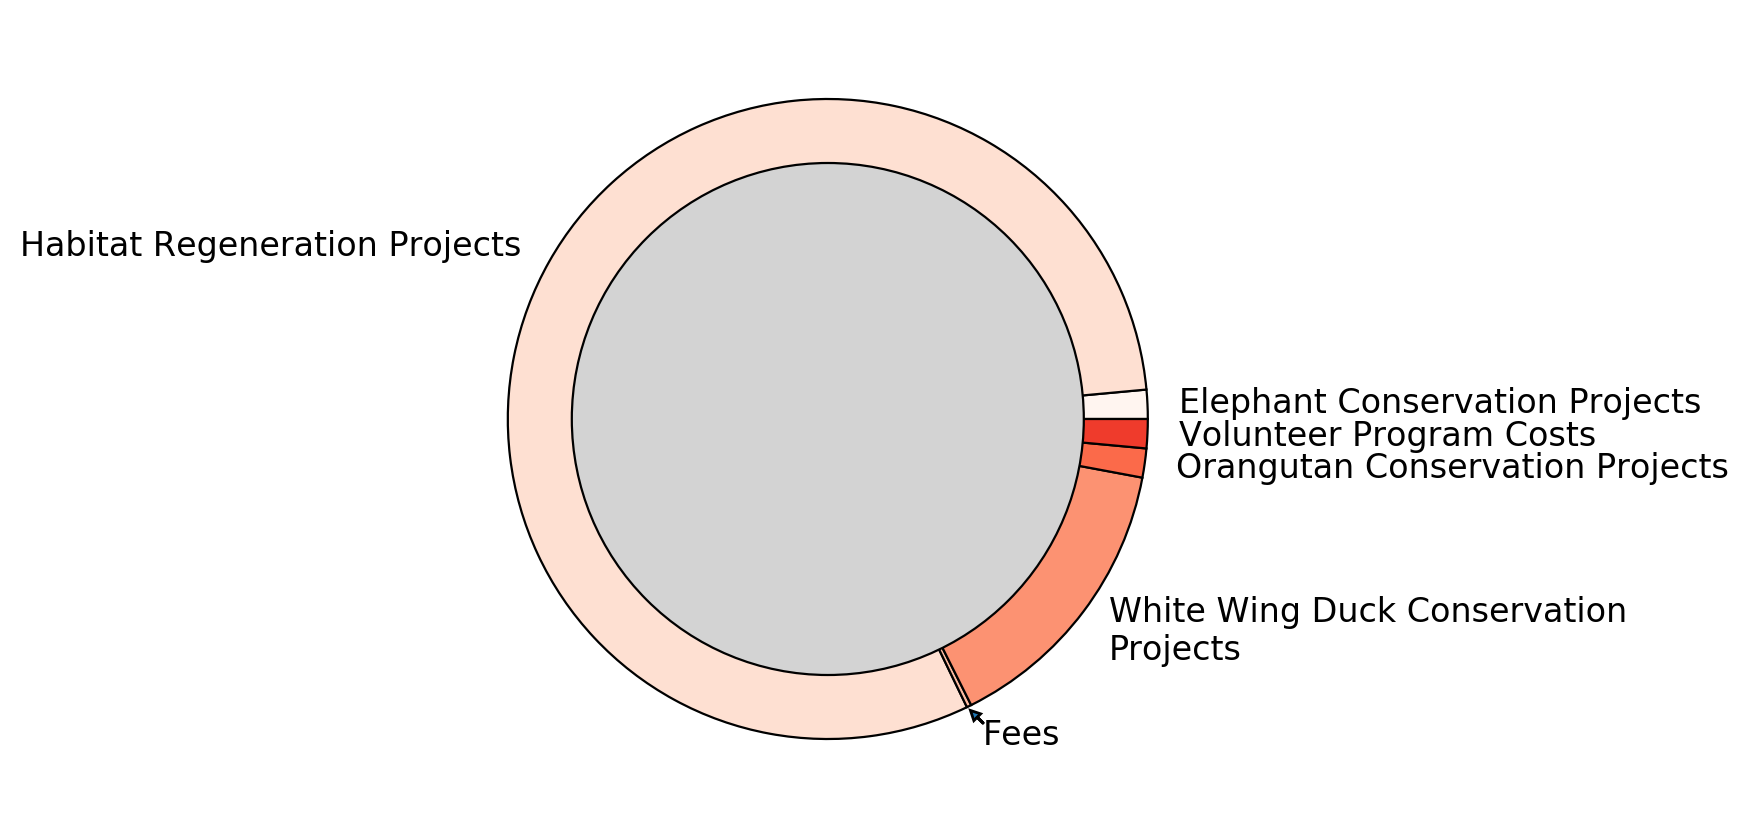

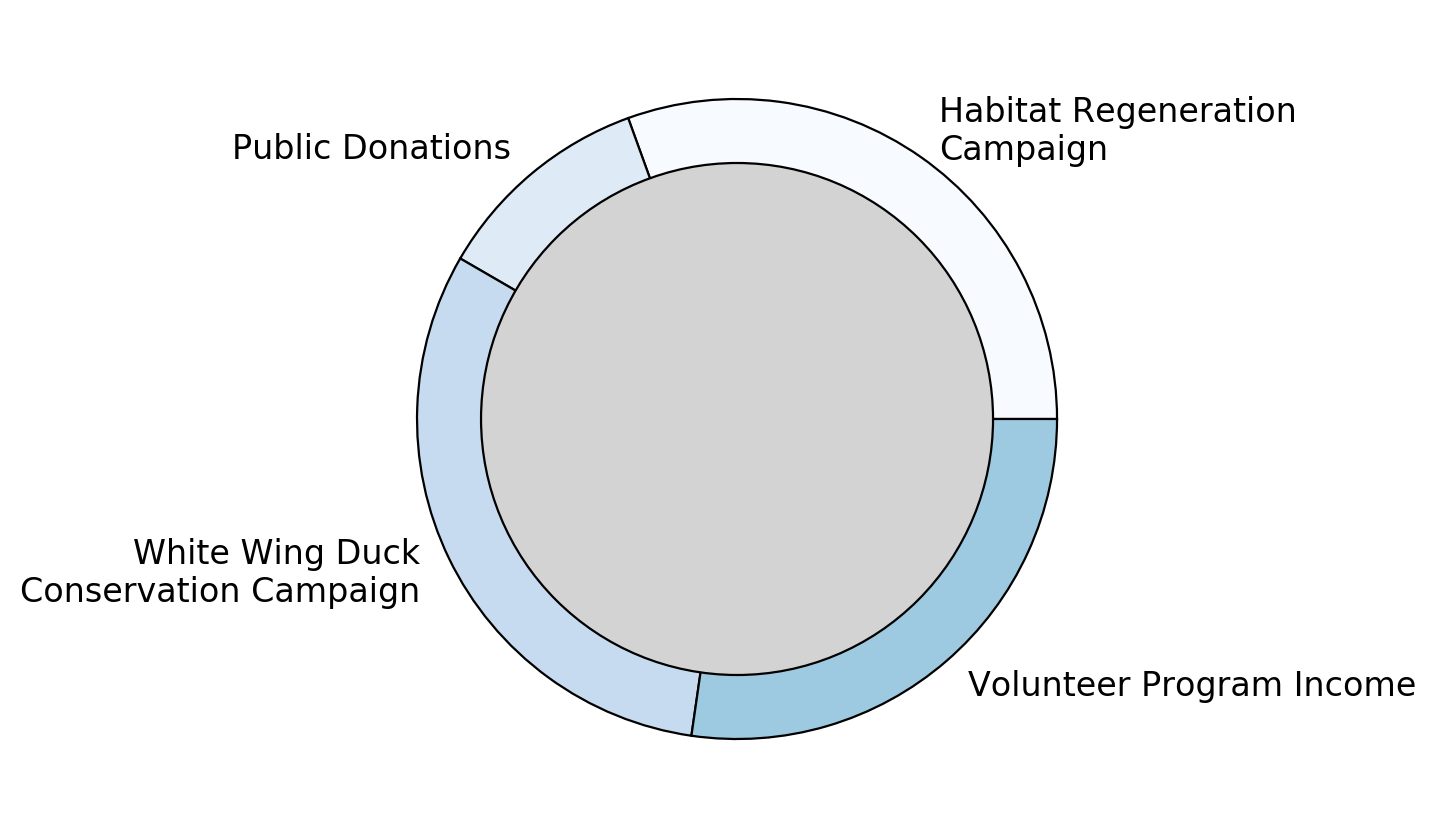

In [80]:
plot_sort_order = {
    'Expenses': (
        # 'Eco-Tours Expenses',
        'Elephant Conservation Projects',
        'Habitat Regeneration Projects',
        'Fees',
        'White Wing Duck Conservation Projects',
        'Orangutan Conservation Projects',
        'Volunteer Program Costs',
    ),
    'Income': (
        # 'Eco-Tours Income',
        'Habitat Regeneration Campaign',
        'Public Donations',
        'White Wing Duck Conservation Campaign',
        'Volunteer Program Income',
    )
}

font_sizes = {'Expenses': 12, 'Income': 12}
wrap_widths = {'Expenses':35, 'Income': 25}
arrows = {'Expenses': [0.485, -0.95, -0.018, 0.018]}
SummaryTools.test_for_missing_groups(full, project_groups)
summaries = SummaryTools.pretty_summary(full, project_groups, analysis_fy)
for i, s in summaries:
    s = s.to_frame()
    s = s.reindex(plot_sort_order[i])
    SummaryTools.pie_chart(s, i, img_dir, arrows, font_sizes, wrap_widths)

In [18]:
table_sort_order = {
    'Expenses': (
        # 'Eco-Tours Expenses',
        'Elephant Conservation Projects',
        'Habitat Regeneration Projects',
        'White Wing Duck Conservation Projects',
        'Orangutan Conservation Projects',
        'Volunteer Program Costs',
        'Fees',
        'Total',
    ),
    'Income': (
        # 'Eco-Tours Income',
        'Public Donations',
        'Habitat Regeneration Campaign',
        'Volunteer Program Income',
        'White Wing Duck Conservation Campaign',
        'Total',
    )
}

for i, s in summaries:
    s['Total'] = s.sum()
    s.name = analysis_fy_str
    s = s.to_frame()
    s['%'] = s[analysis_fy_str] / s[analysis_fy_str].sum() * 200
    s = s[['%', analysis_fy_str]]
    s = s.reindex(table_sort_order[i])
    formatters = {
        analysis_fy_str: SummaryTools.dollar_formatter,
        '%': lambda x: '{:.1f}%'.format(x),
    }
    display(HTML(s.to_html(formatters=formatters)))

,%,FY 19-20
Elephant Conservation Projects,1.5%,"$-1,000"
Habitat Regeneration Projects,80.7%,"$-55,000"
White Wing Duck Conservation Projects,14.7%,"$-10,000"
Orangutan Conservation Projects,1.5%,"$-1,000"
Volunteer Program Costs,1.5%,"$-1,000"
Fees,0.2%,$-160
Total,100.0%,"$-68,160"


,%,FY 19-20
Public Donations,11.1%,"$7,660"
Habitat Regeneration Campaign,30.5%,"$21,043"
Volunteer Program Income,27.3%,"$18,804"
White Wing Duck Conservation Campaign,31.1%,"$21,430"
Total,100.0%,"$68,937"


In [6]:
account = 'Bangalow'
to_drop = ['Internal', 'Non-SIES',]

def display_fy_summary_for_acc(df, acc):
    s = SummaryTools.fy_summary(full[full['Account'] == acc])
    for col in to_drop:
        s = s.drop(col, axis=1)
    
    print('Summary by Financial Year: {} account only'.format(acc))
    display(HTML(s.to_html(formatters=SummaryTools.make_formatters())))
    
def display_fy_summary(df, reporting_fy):
    s = SummaryTools.fy_summary(full)
    for col in to_drop:
        s = s.drop(col, axis=1)
    
    # s = s[s.index <= reporting_fy]
    print('Summary by Financial Year for Both Accounts')
    display(HTML(s.to_html(formatters=SummaryTools.make_formatters())))
    return s
    
# for acc in ('Bangalow', 'Indonesia'):
#     display_fy_summary_for_acc(full, acc)
    
summary = display_fy_summary(full, analysis_fy)

fy_delta = analysis_fy - summary.index.values.max() - 1

display(HTML(pd.DataFrame(
    {analysis_fy_str: [
        summary['Income'].iloc[fy_delta],
        summary['Expenses'].iloc[fy_delta],
        summary['Balance'].iloc[fy_delta - 1],
        summary['Balance'].iloc[fy_delta],
    ]},
    index=['Income', 'Expenses', 'SOFY Balance', 'EOFY Balance']
).to_html(formatters={analysis_fy_str: SummaryTools.dollar_formatter})))

Summary by Financial Year for Both Accounts


,Expenses,Income,Balance
date,,,
2012,$-11,"$9,439","$9,428"
2013,"$-68,962","$79,716","$20,182"
2014,"$-58,940","$53,652","$14,894"
2015,"$-38,620","$44,250","$20,524"
2016,"$-98,800","$104,860","$26,583"
2017,"$-75,010","$68,403","$19,976"
2018,"$-94,696","$94,592","$19,872"
2019,"$-68,160","$68,937","$20,649"
2020,"$-10,030","$1,580","$12,199"


-2


,FY 19-20
Income,"$68,937"
Expenses,"$-68,160"
SOFY Balance,"$19,872"
EOFY Balance,"$20,649"


In [7]:
account = 'Bangalow'
to_drop = ['Balance', 'Internal', 'Non-SIES',]

print('Summary by Project Code: financial year starting {} and {} account only'.format(analysis_fy, account))
summary = SummaryTools.project_summary(full[(
    (full['Account'] == account) &
    SummaryTools.fy_filter(full, analysis_fy)
)])

for col in to_drop:
    summary = summary.drop(col, axis=1)
    
summary.loc['Total', ['Expenses', 'Income']] = summary.sum()
    
display(HTML(summary.to_html(formatters=SummaryTools.make_formatters())))

Summary by Project Code: financial year starting 2019 and Bangalow account only


,Expenses,Income
Project Codes,,
Administrative-Expense,$-160,$0
General-Donation,$0,"$7,660"
Orangutan-Green-Projects,"$-1,000",$0
SCU-Fundraising,$0,"$17,804"
SCU-Tour-Payments,"$-1,000","$1,000"
Way-Kambas-National-Park-Elephant-Project,"$-1,000",$0
Way-Kambas-National-Park-Reforestation-Project,"$-55,000","$21,043"
Way-Kambas-National-Park-WWD-Project,"$-10,000","$21,430"
Total,"$-68,160","$68,937"


In [8]:
to_drop = ['Balance', 'Internal', 'Non-SIES',]

print('Summary by Project Code: financial year starting {}, both accounts'.format(analysis_fy))
s = full[SummaryTools.fy_filter(full, analysis_fy)].groupby('Project Codes').sum()

for col in to_drop:
    s = s.drop(col, axis=1)

s.loc['Total', ['Expenses', 'Income']] = s.sum()
s = s[['Income', 'Expenses']]
s = s.reindex([
    'General-Donation',
    # 'General-Donation-via-PayPal',
    'SCU-Fundraising',
    'SCU-Tour-Payments',
    'Orangutan-Green-Projects',
    'Way-Kambas-National-Park-Elephant-Project',
    'Way-Kambas-National-Park-Reforestation-Project',
    'Way-Kambas-National-Park-WWD-Project',
    # 'International-Park-Tours',
    # 'Payment for Tshirts',
    'Administrative-Expense',
    # 'Bank-Transfer-Expense',
    'Total'
])
    
display(HTML(s.to_html(formatters=SummaryTools.make_formatters())))

Summary by Project Code: financial year starting 2019, both accounts


,Income,Expenses
Project Codes,,
General-Donation,"$7,660",$0
SCU-Fundraising,"$17,804",$0
SCU-Tour-Payments,"$1,000","$-1,000"
Orangutan-Green-Projects,$0,"$-1,000"
Way-Kambas-National-Park-Elephant-Project,$0,"$-1,000"
Way-Kambas-National-Park-Reforestation-Project,"$21,043","$-55,000"
Way-Kambas-National-Park-WWD-Project,"$21,430","$-10,000"
Administrative-Expense,$0,$-160
Total,"$68,937","$-68,160"
